In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def u(x,t):
    return np.exp(x+t)

def f(x,t):
    return 1/2*np.exp(x+t)

def alpha(t):
    return np.exp(t)

def beta(t):
    return np.exp(t+1)

def phi(x):
    return np.exp(x)

### метод контрольного объема

In [21]:
def func_4(x_l,x_r,t_l,t_r,h,tau,plot):
    N = int((x_r - x_l) / h)+1
    K = int((t_r - t_l) / tau)+1


    x = [i * h for i in range(N)] 
    t = [j*tau for j in range(K)]

    matrix_k = np.zeros((len(t),len(x)))

    for i in range(len(t)):
        for j in range(len(x)):
            matrix_k[i][j] = u(x[j],t[i])
    analit=pd.DataFrame(matrix_k)   
    
    # домнож на 2, чтобы увел общее кол-во интервалов на слое (см ниже)
    N = int((x_r - x_l) / h)+1
    K = int((t_r - t_l) / tau)+1


    x = [i * h for i in range(N)] 
    t = [j*tau for j in range(K)]


    y_prev = [0. for i in range(N)] # u(x,0) - заполненние "целых" слоев
    y_prev_1 = [alpha(t[i]) for i in range(K)] # u(0,t) - заполненние "целых" слоев

    matrix_ksi = np.zeros((len(t),len(x))) # матрица кси(j),len(x)-2 --> от 1 до N-1 точки   

    matrix_1 = np.zeros((K,N)) # K - строк - время, N - столбцов - координата

    matrix_1[:,0] = y_prev_1 # u(0,t)
    matrix_1[0,:] = y_prev # u(x,0)
    matrix_1[:,-1] = [beta(t[i]) for i in range(len(np.array(t)))] #заполнение u(1,t) в целых полуслоях

    a = 0.5

    matrix_ans = np.zeros((len(t),len(x)))

    matrix_ans[0] = matrix_1[0]

    A = np.zeros(len(x)-2) #1,m-1

    for j in range(A.shape[0]):
        A[j] = a/h

    C = np.zeros(len(x)-2) #1,m-1

    for j in range(C.shape[0]):
        C[j] = a/h

    B = np.zeros(len(x)-2) #1,m-1

    for j in range(B.shape[0]):
        B[j] = A[j] + C[j] + 1

    for i in range(1,matrix_ans.shape[0]):

        D = np.zeros(len(x)-2) #1,m-1

        for j in range(D.shape[0]):
            D[j] = (f(x[j+1],t[i])) * h + matrix_ans[i-1][j+1]

        matrix_g = np.zeros((len(x)-2, len(x)-2))

        matrix_g[0][0] = B[0]
        matrix_g[0][1] = -C[0]

        for s in range(1,matrix_g.shape[0]):
            if s!=matrix_g.shape[0]-1:
                j = s
                matrix_g[s][j] = B[s]
                matrix_g[s][j+1] = -C[s]
                matrix_g[s][j-1] = -A[s]

        matrix_g[-1][-1] = B[-1]
        matrix_g[-1][-2] = -A[-1]


        matrix_ans_1 = np.zeros(len(x)-2)

        for m in range(matrix_ans_1.shape[0]):
            if m==0.:
                matrix_ans_1[m] = D[0]+A[0]*matrix_1[i][0]
            if m==matrix_ans_1.shape[0]-1:
                matrix_ans_1[m] = D[m]+C[m]*matrix_1[i][-1]
            if m>0. and m<matrix_ans_1.shape[0]-1:
                matrix_ans_1[m] = D[m]

        m = np.linalg.solve(matrix_g, matrix_ans_1)

        m = np.append(m,matrix_1[i][-1])
        m = np.append(matrix_1[i][0],m)

        matrix_ans[i] = m
    ans=pd.DataFrame(matrix_ans)
    if plot == 1:
        plt.plot(x,ans.iloc[-1,:],label = f' h = {h}')
        plt.legend()
    
    return analit,ans, x

In [22]:
x_l = 0.0
x_r = 1.0
t_l = 0.0
t_r = 3
tau = 0.01
h = 0.01
analit, ans, x = func_4(x_l,x_r,t_l,t_r,h,tau,0)
import plotly.express as px
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=x,y=analit.iloc[-1,:],mode='lines+markers',name='Аналитическое решение'))
fig.add_trace(go.Scatter(x=x,y=ans.iloc[-1,:],mode='lines+markers',name='Численное решение'))
fig.update_layout(title='Метод контрольного объема')
fig.show()

# Доп задача

$$ \frac{||x^{(n)} - \overline x || }{||x^{(n)} - x^{(n-1)} ||}$$

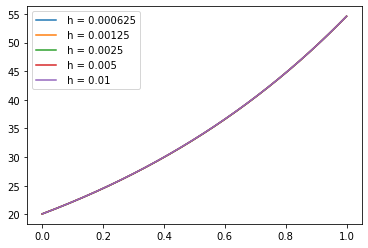

In [71]:
x_l = 0.0
x_r = 1.0
t_l = 0.0
t_r = 3

list_aprior = []
df = pd.DataFrame()

h = 0.01/16
tau = 0.01/16
analit, ans, _ = func_4(x_l,x_r,t_l,t_r,h,tau,1)
df[f'h = {h}, оценка = {np.linalg.norm(analit.iloc[-1,:]-ans.iloc[-1,:])/np.linalg.norm(pd.DataFrame(analit.iloc[0,:]-analit.iloc[-2,:]))}']=(analit.iloc[-1,:]-ans.iloc[-1,:])

h = 0.01/8
tau = 0.01/8
analit, ans, _ = func_4(x_l,x_r,t_l,t_r,h,tau,1)
df[f'h = {h}, оценка = {np.linalg.norm(analit.iloc[-1,:]-ans.iloc[-1,:])/np.linalg.norm(pd.DataFrame(analit.iloc[0,:]-analit.iloc[-2,:]))}']=(analit.iloc[-1,:]-ans.iloc[-1,:])[:]

h = 0.01/4
tau = 0.01/4
analit, ans, _ = func_4(x_l,x_r,t_l,t_r,h,tau,1)
df[f'h = {h}, оценка = {np.linalg.norm(analit.iloc[-1,:]-ans.iloc[-1,:])/np.linalg.norm(pd.DataFrame(analit.iloc[0,:]-analit.iloc[-2,:]))}']=(analit.iloc[-1,:]-ans.iloc[-1,:])[:]

h = 0.01/2
tau = 0.01/2
analit, ans, _ = func_4(x_l,x_r,t_l,t_r,h,tau,1)
df[f'h = {h}, оценка = {np.linalg.norm(analit.iloc[-1,:]-ans.iloc[-1,:])/np.linalg.norm(pd.DataFrame(analit.iloc[0,:]-analit.iloc[-2,:]))}']=(analit.iloc[-1,:]-ans.iloc[-1,:])[:]

h = 0.01
tau = 0.01
analit, ans, _ = func_4(x_l,x_r,t_l,t_r,h,tau,1)
df[f'h = {h}, оценка = {np.linalg.norm(analit.iloc[-1,:]-ans.iloc[-1,:])/np.linalg.norm(pd.DataFrame(analit.iloc[0,:]-analit.iloc[-2,:]))}']=(analit.iloc[-1,:]-ans.iloc[-1,:])[:]


In [72]:
df.head(2000)

,"h = 0.000625, оценка = 4.7287582753736193e-05","h = 0.00125, оценка = 9.460530791677263e-05","h = 0.0025, оценка = 0.00018928152179604517","h = 0.005, оценка = 0.0003787975394589946","h = 0.01, оценка = 0.0007584869734284354"
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.000005,-0.000019,-0.000076,-0.000302,-0.001204
2,-0.000009,-0.000038,-0.000151,-0.000602,-0.002387
3,-0.000014,-0.000057,-0.000226,-0.000900,-0.003551
4,-0.000019,-0.000076,-0.000301,-0.001195,-0.004694
...,...,...,...,...,...
1596,-0.000027,NaN,NaN,NaN,NaN
1597,-0.000021,NaN,NaN,NaN,NaN
1598,-0.000014,NaN,NaN,NaN,NaN
1599,-0.000007,NaN,NaN,NaN,NaN
